# 评估同化算法的性能


In [1]:
%load_ext autoreload
%autoreload 2

## 基本参数设置

In [2]:
# Depending on your combination of package versions, this can raise a lot of TF warnings... 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["nature", "no-latex"])
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import xarray as xr
from pathlib import Path
import pickle
import sys 
sys.path.append('../')

In [3]:
da_cycle_dir = "/public/home/wangwuxing01/research/fundation/output_npj/da_cycle"
medium_forecast_dir = "/public/home/wangwuxing01/research/fundation/output_npj/medium_forecast"
scaler_dir = "/public/home/wangwuxing01/research/fundation/data/era5_6_hourly/assim_dir_3day/scaler.pkl"
var_idx_dir = "/public/home/wangwuxing01/research/fundation/data/era5_6_hourly/assim_dir_3day/var_idx.npy"

In [4]:
var_idx = [k for k in np.load(var_idx_dir)]

In [5]:
plot_vars = ["Z", "T", "R", "U"]
unit_y = ["(m$^2$ s$^{-2}$)", "(K)", "(%)", "(m s$^{-1}$)"]
plot_idx = [1, 10, 22, 20, 21, 23, 9, 5, 13, 17]

In [6]:
tmp = xr.open_mfdataset("/public/home/wangwuxing01/research/fundation/data/era5_6_hourly/obs_r_2010.nc", 
                  combine="by_coords", parallel=True)

In [7]:
lat, lon = tmp.latitude.values, tmp.longitude.values

In [8]:
idx = 39

In [9]:
xb = np.load(f"{da_cycle_dir}/xb_3day.npy")[idx].astype(np.float32)

xa_dacycle_4dvarnet = np.load(f"{da_cycle_dir}/assim_4dvarnet_obs[8, 9, 10, 11, 20, 21]_xb_3day.npy")[idx, 0].astype(np.float32)
xa_dacycle_vit = np.load(f"{da_cycle_dir}/assim_vit_obs[8, 9, 10, 11, 20, 21]_xb_3day.npy")[idx, 0].astype(np.float32)
xa_dacycle_4dvarformer = np.load(f"{da_cycle_dir}/assim_4dvarformer_obs[8, 9, 10, 11, 20, 21]_xb_3day.npy")[idx, 0].astype(np.float32)

xt = np.load(f"{da_cycle_dir}/real_xb_3day.npy")[idx, 0].astype(np.float32)

In [10]:
z500 = [xb[1], xa_dacycle_4dvarnet[1], xa_dacycle_vit[1], xa_dacycle_4dvarformer[1], xt[1]]
t850 = [xb[10], xa_dacycle_4dvarnet[10], xa_dacycle_vit[10], xa_dacycle_4dvarformer[10], xt[10]]
t2m = [xb[22], xa_dacycle_4dvarnet[22], xa_dacycle_vit[22], xa_dacycle_4dvarformer[22], xt[22]]
u10 = [xb[20], xa_dacycle_4dvarnet[20], xa_dacycle_vit[20], xa_dacycle_4dvarformer[20], xt[20]]
v10 = [xb[21], xa_dacycle_4dvarnet[21], xa_dacycle_vit[21], xa_dacycle_4dvarformer[21], xt[21]]
wsp = [np.sqrt(u10[i]**2+v10[i]**2) for i in range(len(u10))]
vis = [z500, t850, t2m, wsp]

In [11]:
titles = ["Background", "4DVarNet", "ViT", "4DVarFormer", "ERA5 (ground truth)"]
ylables = ["500hPa geopotential (m$^2$ s$^{-2}$)", "850hPa temperature (K)", "2-m temperature (K)", "10-m wind speed (m s$^{-1}$)"]

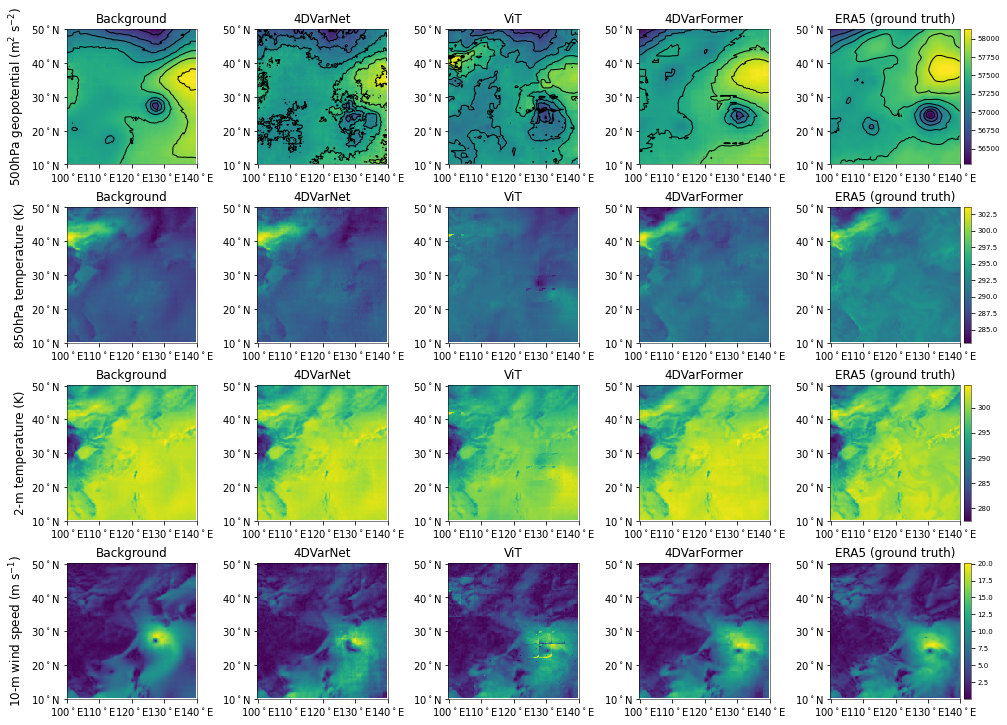

In [12]:
fig, axes = plt.subplots(4, 5, figsize=(14, 10))
for i in range(4):
    for j in range(5):
        axes[i, j].set_title(titles[j], fontsize=12)
        im = axes[i, j].pcolormesh(lon[:-1], lat[:-1], vis[i][j])
        if i == 0:
            axes[i, j].contour(lon[:-1], lat[:-1], vis[i][j], colors="black")
        axes[i,j].set_xticks([100, 110, 120, 130, 140])
        axes[i,j].set_xticklabels(["{}$^\circ$E".format(x) if  x > 0 else "{}$^\circ$W".format(np.abs(x)) for x in axes[i,j].get_xticks()], fontsize=10)
        axes[i,j].set_yticks([10, 20, 30, 40, 50])
        axes[i,j].set_yticklabels(["{}$^\circ$N".format(y) if y > 0 else "{}$^\circ$S".format(np.abs(y)) for y in axes[i,j].get_yticks()], fontsize=10)
        if j in [0, 5, 10, 15, 20]:
            label = axes[i, j].set_ylabel(ylables[i], fontsize=12)
        if j in [4, 9, 14, 19, 24]:
            divider = make_axes_locatable(axes[i, j])
            cax = divider.append_axes("right", size="5%", pad=0.05)
            fig.colorbar(im, cax=cax)
        else:
            divider = make_axes_locatable(axes[i, j])
            cax = divider.append_axes("right", size="5%", pad=0.05)
            cax.set_visible(False)
                    
plt.tight_layout()
plt.savefig(f'snapshot.jpg',dpi=300)
plt.savefig(f'snapshot.pdf',dpi=300)
plt.show() 

In [13]:
xa_dacycle_4dvarnet = np.load(f"{da_cycle_dir}/assim_4dvarnet_obs[20, 21]_xb_3day.npy")[idx, 0].astype(np.float32)
xa_dacycle_vit = np.load(f"{da_cycle_dir}/assim_vit_obs[20, 21]_xb_3day.npy")[idx, 0].astype(np.float32)
xa_dacycle_4dvarformer = np.load(f"{da_cycle_dir}/assim_4dvarformer_obs[20, 21]_xb_3day.npy")[idx, 0].astype(np.float32)

xt = np.load(f"{da_cycle_dir}/real_xb_3day.npy")[idx, 0].astype(np.float32)

In [14]:
titles = ["Background", "4DVarNet", "ViT", "4DVarFormer", "ERA5 (ground truth)"]
ylables = ["500hPa geopotential (m$^2$ s$^{-2}$)", "850hPa geopotential (m$^2$ s$^{-2}$)", 
           "mean sea level pressure (Pa)", "10-m wind speed (m s$^{-1}$)"]

In [15]:
z500 = [xb[1], xa_dacycle_4dvarnet[1], xa_dacycle_vit[1], xa_dacycle_4dvarformer[1], xt[1]]
z850 = [xb[2], xa_dacycle_4dvarnet[2], xa_dacycle_vit[2], xa_dacycle_4dvarformer[2], xt[2]]
msl = [xb[23], xa_dacycle_4dvarnet[23], xa_dacycle_vit[23], xa_dacycle_4dvarformer[23], xt[23]]
u10 = [xb[20], xa_dacycle_4dvarnet[20], xa_dacycle_vit[20], xa_dacycle_4dvarformer[20], xt[20]]
v10 = [xb[21], xa_dacycle_4dvarnet[21], xa_dacycle_vit[21], xa_dacycle_4dvarformer[21], xt[21]]
wsp = [np.sqrt(u10[i]**2+v10[i]**2) for i in range(len(u10))]
vis = [z500, z850, msl, wsp]

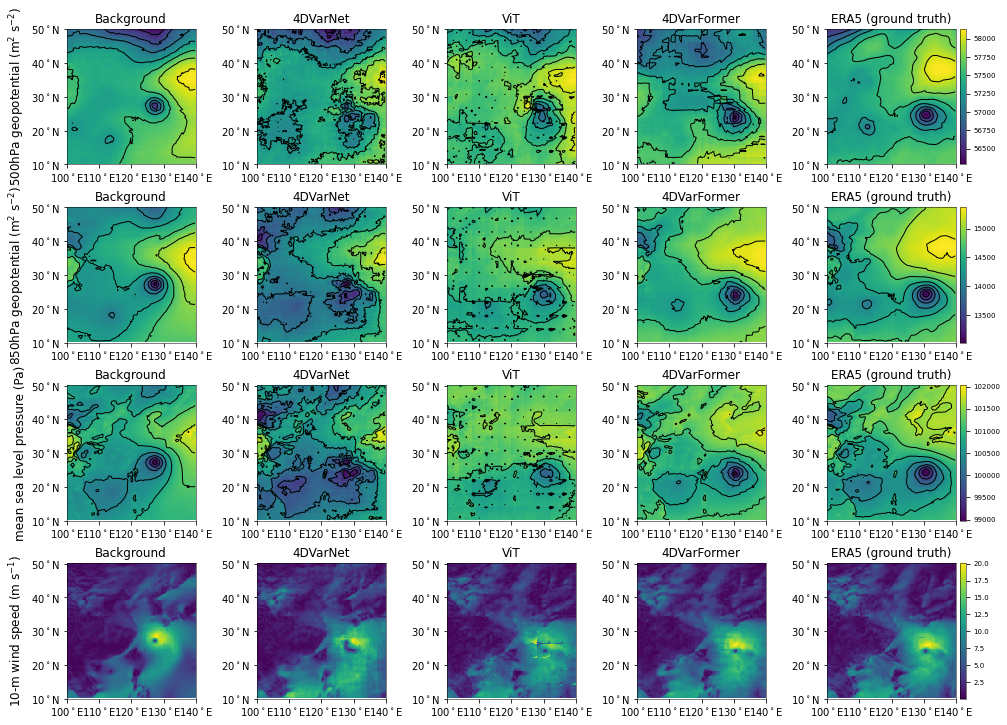

In [16]:
fig, axes = plt.subplots(4, 5, figsize=(14, 10))
for i in range(4):
    for j in range(5):
        axes[i, j].set_title(titles[j], fontsize=12)
        im = axes[i, j].pcolormesh(lon[:-1], lat[:-1], vis[i][j])
        if i in [0, 1, 2]:
            axes[i, j].contour(lon[:-1], lat[:-1], vis[i][j], colors="black")
        axes[i,j].set_xticks([100, 110, 120, 130, 140])
        axes[i,j].set_xticklabels(["{}$^\circ$E".format(x) if  x > 0 else "{}$^\circ$W".format(np.abs(x)) for x in axes[i,j].get_xticks()], fontsize=10)
        axes[i,j].set_yticks([10, 20, 30, 40, 50])
        axes[i,j].set_yticklabels(["{}$^\circ$N".format(y) if y > 0 else "{}$^\circ$S".format(np.abs(y)) for y in axes[i,j].get_yticks()], fontsize=10)
        if j in [0, 5, 10, 15, 20]:
            label = axes[i, j].set_ylabel(ylables[i], fontsize=12)
        if j in [4, 9, 14, 19, 24]:
            divider = make_axes_locatable(axes[i, j])
            cax = divider.append_axes("right", size="5%", pad=0.05)
            fig.colorbar(im, cax=cax)
        else:
            divider = make_axes_locatable(axes[i, j])
            cax = divider.append_axes("right", size="5%", pad=0.05)
            cax.set_visible(False)
                    
plt.tight_layout()
plt.savefig(f'snapshot_wind.jpg',dpi=300)
plt.savefig(f'snapshot_wind.pdf',dpi=300)
plt.show()

In [17]:
xa_dacycle_4dvarnet = np.load(f"{da_cycle_dir}/assim_4dvarnet_obs[8, 9, 10, 11]_xb_3day.npy")[idx, 0].astype(np.float32)
xa_dacycle_vit = np.load(f"{da_cycle_dir}/assim_vit_obs[8, 9, 10, 11]_xb_3day.npy")[idx, 0].astype(np.float32)
xa_dacycle_4dvarformer = np.load(f"{da_cycle_dir}/assim_4dvarformer_obs[8, 9, 10, 11]_xb_3day.npy")[idx, 0].astype(np.float32)

xt = np.load(f"{da_cycle_dir}/real_xb_3day.npy")[idx, 0].astype(np.float32)

In [18]:
titles = ["Background", "4DVarNet", "ViT", "4DVarFormer", "ERA5 (ground truth)"]
ylables = ["500hPa relative humidity (%)", 
           "500hPa temperature (K)", 
           "850hPa relative humidity (%)", 
           "850hPa temperature (K)"]

In [19]:
r500 = [xb[5], xa_dacycle_4dvarnet[5], xa_dacycle_vit[5], xa_dacycle_4dvarformer[5], xt[5]]
t500 = [xb[9], xa_dacycle_4dvarnet[9], xa_dacycle_vit[9], xa_dacycle_4dvarformer[9], xt[9]]
r850 = [xb[6], xa_dacycle_4dvarnet[6], xa_dacycle_vit[6], xa_dacycle_4dvarformer[6], xt[6]]
t850 = [xb[10], xa_dacycle_4dvarnet[10], xa_dacycle_vit[10], xa_dacycle_4dvarformer[10], xt[10]]
vis = [r500, t500, r850, t850]

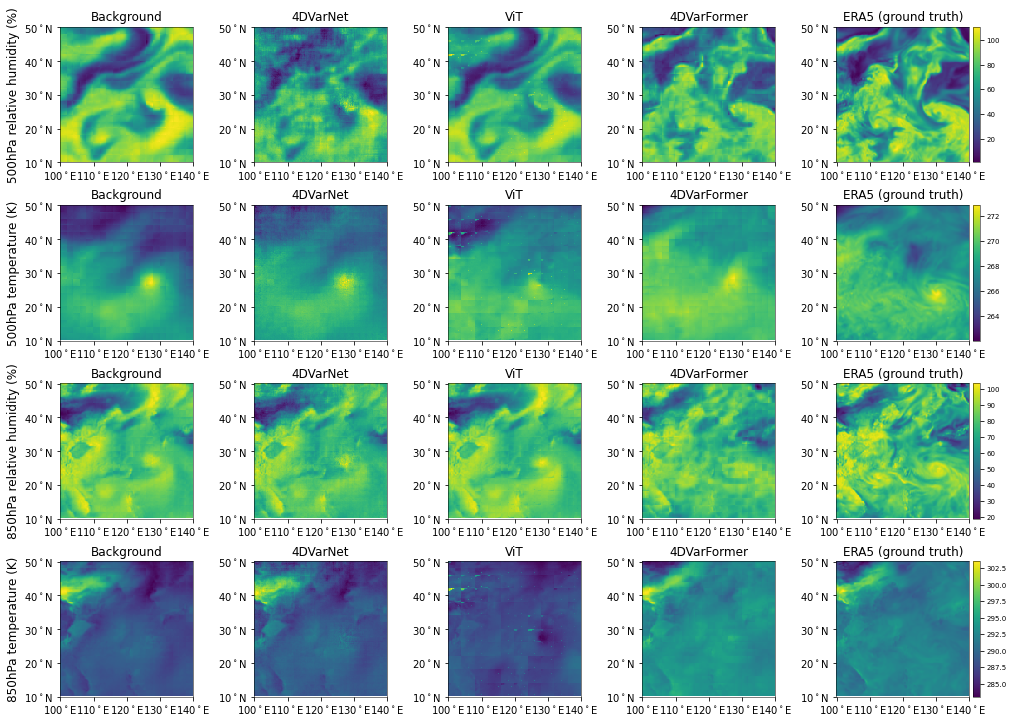

In [20]:
fig, axes = plt.subplots(4, 5, figsize=(14, 10))
for i in range(4):
    for j in range(5):
        axes[i, j].set_title(titles[j], fontsize=12)
        im = axes[i, j].pcolormesh(lon[:-1], lat[:-1], vis[i][j])
        axes[i,j].set_xticks([100, 110, 120, 130, 140])
        axes[i,j].set_xticklabels(["{}$^\circ$E".format(x) if  x > 0 else "{}$^\circ$W".format(np.abs(x)) for x in axes[i,j].get_xticks()], fontsize=10)
        axes[i,j].set_yticks([10, 20, 30, 40, 50])
        axes[i,j].set_yticklabels(["{}$^\circ$N".format(y) if y > 0 else "{}$^\circ$S".format(np.abs(y)) for y in axes[i,j].get_yticks()], fontsize=10)
        if j in [0, 5, 10, 15, 20]:
            label = axes[i, j].set_ylabel(ylables[i], fontsize=12)
        if j in [4, 9, 14, 19, 24]:
            divider = make_axes_locatable(axes[i, j])
            cax = divider.append_axes("right", size="5%", pad=0.05)
            fig.colorbar(im, cax=cax)
        else:
            divider = make_axes_locatable(axes[i, j])
            cax = divider.append_axes("right", size="5%", pad=0.05)
            cax.set_visible(False)
                    
plt.tight_layout()
plt.savefig(f'snapshot_temp.jpg',dpi=300)
plt.savefig(f'snapshot_temp.pdf',dpi=300)
plt.show()